<a href="https://colab.research.google.com/github/raden-dimas012/RockScissorPapperDicoding/blob/main/SUBMISS_DICODING_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from IPython.display import HTML, display
from google.colab import files
from keras.preprocessing import image
%matplotlib inline

Using TensorFlow backend.


In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-07-23 16:56:18--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  16.7MB/s    in 16s     

2020-07-23 16:56:34 (19.8 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
pip install split_folders

In [ ]:
import split_folders
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', output="/tmp/rockpaperscissors/data", seed=1337, ratio=(.6, .4))

Copying files: 2188 files [00:00, 3194.67 files/s]


In [ ]:
# membuat nama directori
base_dir = '/tmp/rockpaperscissors/data'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)
score = model.evaluate(validation_generator, verbose=0)
print('Test loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.2%}'.format(score[1]))

Epoch 1/20
25/25 - 42s - loss: 1.1180 - accuracy: 0.3438 - val_loss: 1.1018 - val_accuracy: 0.3000
Epoch 2/20
25/25 - 41s - loss: 0.8623 - accuracy: 0.5700 - val_loss: 0.6973 - val_accuracy: 0.7812
Epoch 3/20
25/25 - 41s - loss: 0.5092 - accuracy: 0.7862 - val_loss: 0.4846 - val_accuracy: 0.8375
Epoch 4/20
25/25 - 44s - loss: 0.3266 - accuracy: 0.8650 - val_loss: 0.3140 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 41s - loss: 0.2580 - accuracy: 0.9100 - val_loss: 0.2321 - val_accuracy: 0.9250
Epoch 6/20
25/25 - 41s - loss: 0.2273 - accuracy: 0.9212 - val_loss: 0.2187 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 41s - loss: 0.2163 - accuracy: 0.9312 - val_loss: 0.2161 - val_accuracy: 0.9125
Epoch 8/20
25/25 - 41s - loss: 0.1825 - accuracy: 0.9425 - val_loss: 0.1920 - val_accuracy: 0.9438
Epoch 9/20
25/25 - 41s - loss: 0.1862 - accuracy: 0.9438 - val_loss: 0.3148 - val_accuracy: 0.8875
Epoch 10/20
25/25 - 41s - loss: 0.1507 - accuracy: 0.9513 - val_loss: 0.1153 - val_accuracy: 0.9500
Epoch 11/

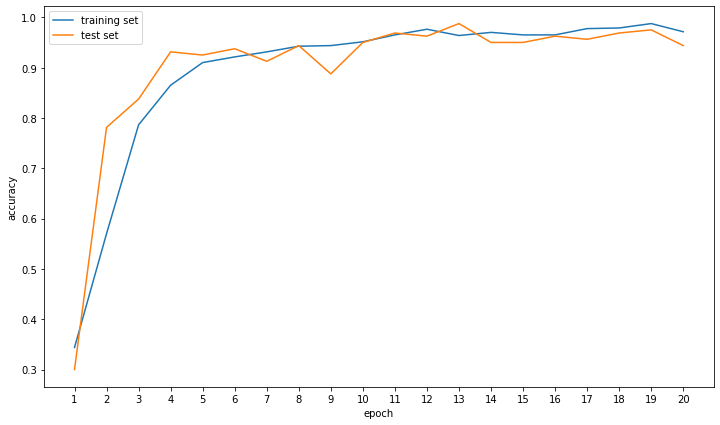

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(range(1,21), history.history['accuracy'], label='training set')
plt.plot(range(1,21), history.history['val_accuracy'], label='test set')
plt.xticks(range(1,21), range(1,21))
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend();

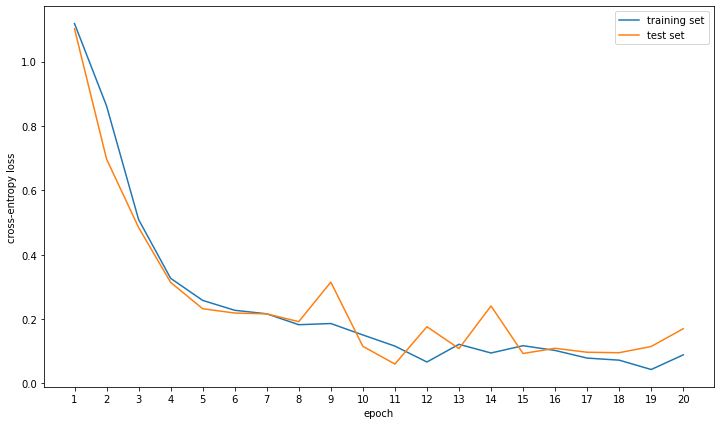

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
plt.plot(range(1,21), history.history['loss'], label='training set')
plt.plot(range(1,21), history.history['val_loss'], label='test set')
plt.xticks(range(1,21), range(1,21))
plt.xlabel('epoch')
plt.ylabel('cross-entropy loss')
plt.legend();

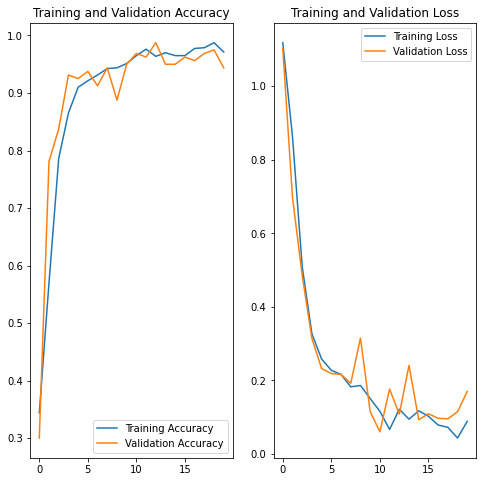

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving WhatsApp Image 2020-07-23 at 23.53.06.jpeg to WhatsApp Image 2020-07-23 at 23.53.06.jpeg
WhatsApp Image 2020-07-23 at 23.53.06.jpeg
rock


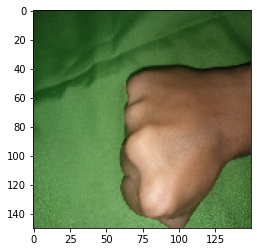

In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')